# EDA - Análise exploratória dos dados com Python e Seaborn

Para este hands on vamos usar o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). Este dataset disponibiliza informações dos passageiros do Titanic, inclusive com as informações dos que sobreviveram ou não.

Este dataset já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## Dicionário de Dados

**Survived**: Sobrevivente (Não=0, Sim=1)

**Pclass**: Classe de ingresso (1=1st, 2=2nd, 3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos e cônjuges a bordo do Titanic

**Parch**: Quantidade de pais e filhos  a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



## Import as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Acesse os dados

* Crie um dataframe com o arquivo **titanic_train.csv** ...

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploração dos dados


- Houve mais sobreviventes ou não?

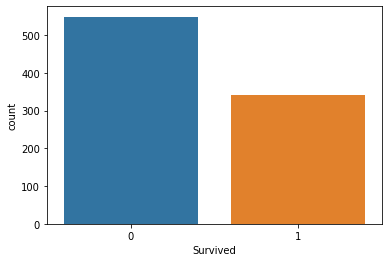

In [4]:
#len(df.groupby(['Survived']).count().iloc[0])
sns.countplot(x='Survived', data=df)

  - Morreram mais homens ou mulheres? Plot os dados no countplot com a informação do gênero fazendo a distinção entre os sobreviventes. (Dica: use o parâmetro hue)

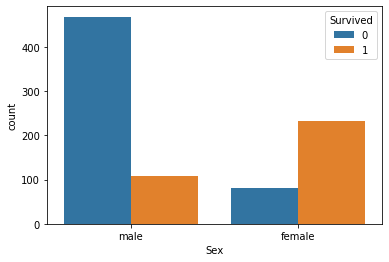

In [5]:
sns.countplot(x='Sex', hue='Survived', data=df)

- E quanto ao número de mortos considerando a classe?

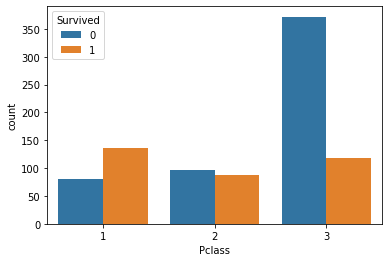

In [6]:
sns.countplot(x='Pclass', hue='Survived', data=df)

- E se quisermos obter informação anterior (sobreviventes por distinção por classe) fazendo distinção por gênero?

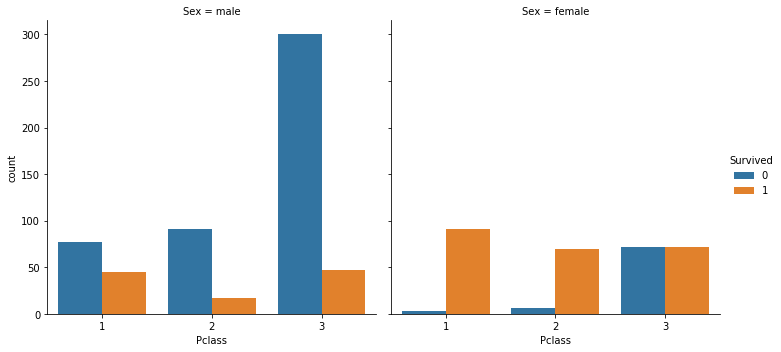

In [9]:
sns.catplot(x='Pclass', hue='Survived', col="Sex", kind="count", data=df)

- Qual classe comprou mais ingressos?

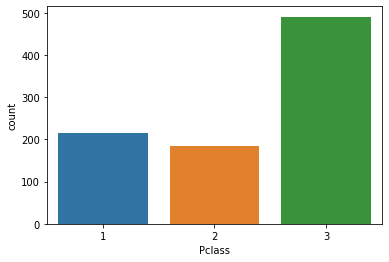

In [10]:
sns.countplot(x='Pclass', data=df)

- Qual classe gastou mais com os ingressos? E qual o preço médio de cada ingresso considerando a classe?

In [11]:
df.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


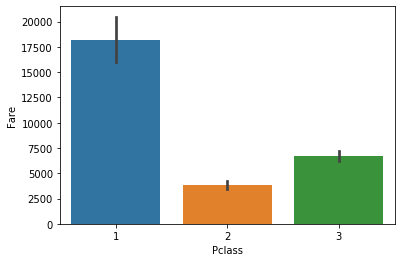

In [12]:
#Total
sns.barplot(x='Pclass', y='Fare', data=df, estimator=np.sum)

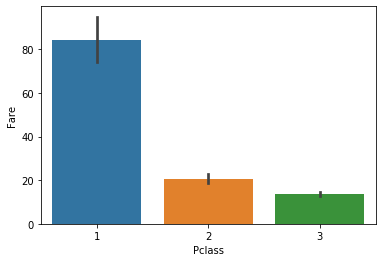

In [13]:
#Média
sns.barplot(x='Pclass', y='Fare', data=df, estimator=np.mean)

- Construa os mesmos gráficos relacionados aos custos do ingresso, mas fazendo distinção por classe e gênero.

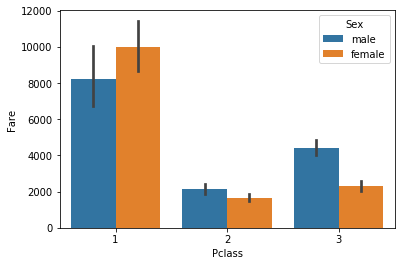

In [14]:
#Total
sns.barplot(x='Pclass', y='Fare', hue='Sex', data=df, estimator=np.sum)

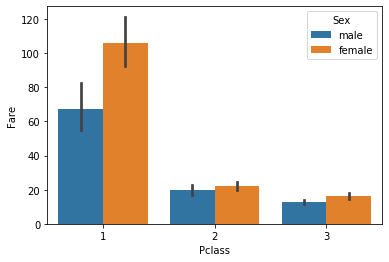

In [15]:
#Média
sns.barplot(x='Pclass', y='Fare', hue='Sex', data=df, estimator=np.mean)

- Crie um boxPlot e um swarplot considerando a classe e a idade. Quais insights você consegue tirar a partir dessa informação?

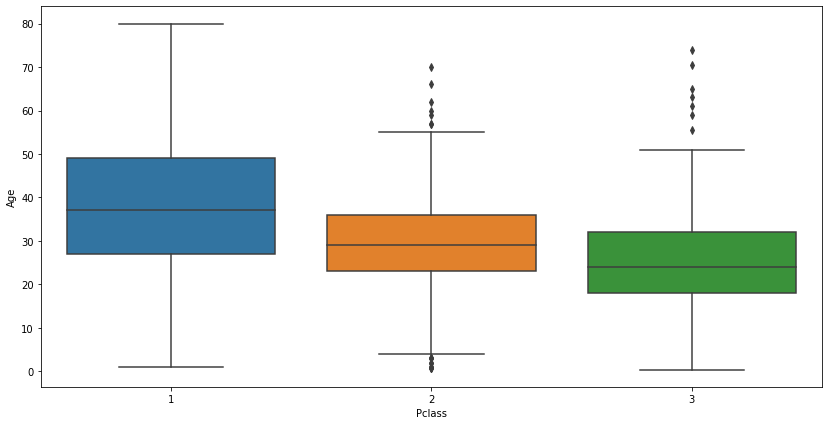

In [16]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Pclass', y='Age', data=df)

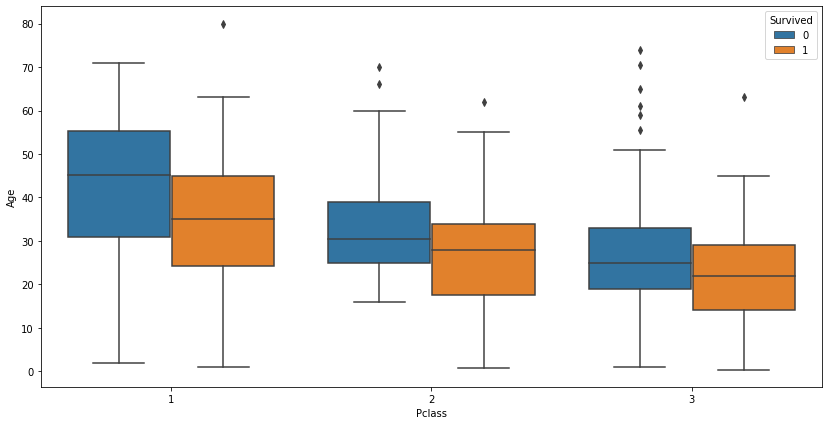

In [17]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)

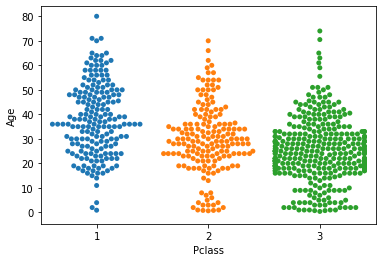

In [18]:
sns.swarmplot(x='Pclass', y='Age', data=df[df['Age'].notnull()])

- Crie um histograma da Idade? O que você observa nessa gráficos?

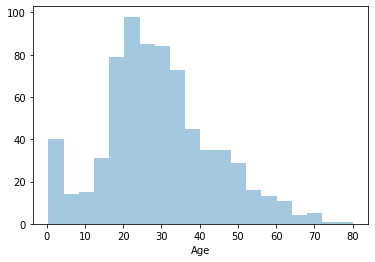

In [19]:
#sns.distplot(data['expenses'], kde = False);
sns.distplot(df[df['Age'].notna()]['Age'], kde=False)

- Qual a distribuição do preço da tarifa? Qual insight a partir do gráfico?

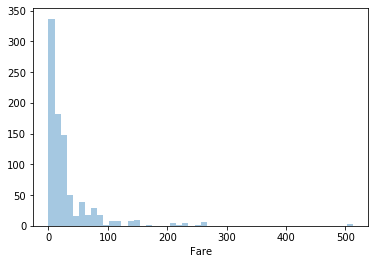

In [20]:
#sns.distplot(data['expenses'], kde = False);
sns.distplot(df[df['Fare'].notna()]['Fare'], kde=False)

- Plot um gráfico para verificar a relação entre idade, classe e sobrevivente. Intreprete o gráfico.

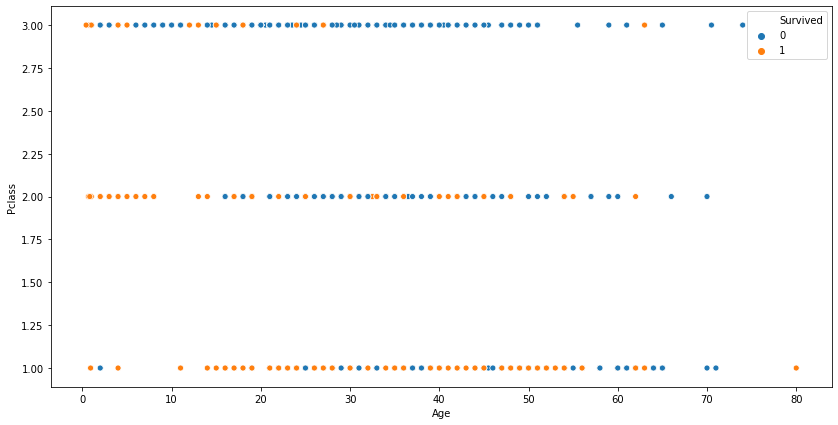

In [21]:
# Relação entre a variável x e y
plt.figure(figsize=(14, 7))
sns.scatterplot(x="Age", y="Pclass", hue="Survived", data=df) 

- Plot o gráfico de correlação linear entre as variáveis e realize algumas análises =D

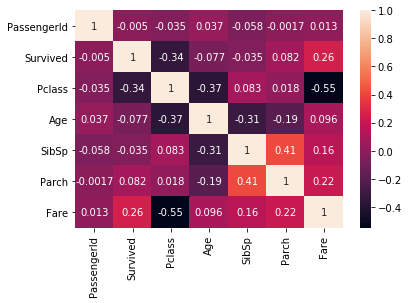

In [22]:
sns.heatmap(df.corr(), annot=True)